# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install mlxtend

# Load the Iris dataset

In [3]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df = df[['sepal_length','petal_length','species']]

In [8]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Softmax/Multinomial Logistic Regression

## Label encode the species column

In [9]:
le = LabelEncoder()

In [10]:
df['species'] = le.fit_transform(df['species'])

In [11]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [12]:
df['species'].unique()

array([0, 1, 2])

## Train Test Split

In [13]:
X = df.drop('species', axis=1)
y = df['species']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

## Fit the model

In [16]:
lor = LogisticRegression(multi_class='multinomial')

In [17]:
lor.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

## Prediction on test data

In [18]:
y_pred = lor.predict(X_test)

## Metrics

### Confusion Matrix

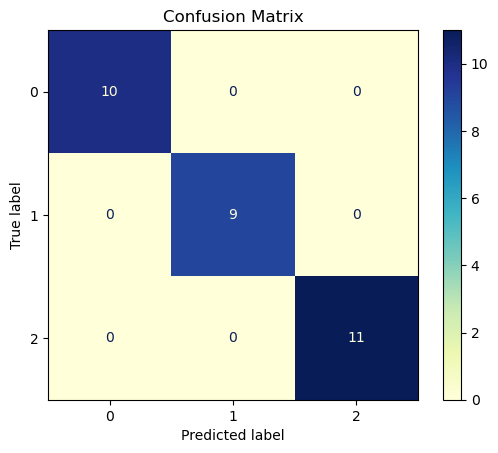

In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=lor.classes_)
disp.plot(cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

### Classification Report

In [20]:
print(f'Classification Report: \n', classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Prediction of probablilites on unseen data

In [21]:
# sepal_length, petal_length
query = np.array([[4.3, 1.5]]) 
lor.predict_proba(query)

array([[9.78387718e-01, 2.16118682e-02, 4.13489419e-07]])

[[0.978387718, 0.0216118682, 0.000000413489419]]

* The given data point has probabilities of - 
    * 0.978 of setosa
    * 0.02 of versicolor
    * 0.00 of virginica

In [22]:
lor.predict(query)

array([0])

* This will give the maximum probability.

## Decision Boundary

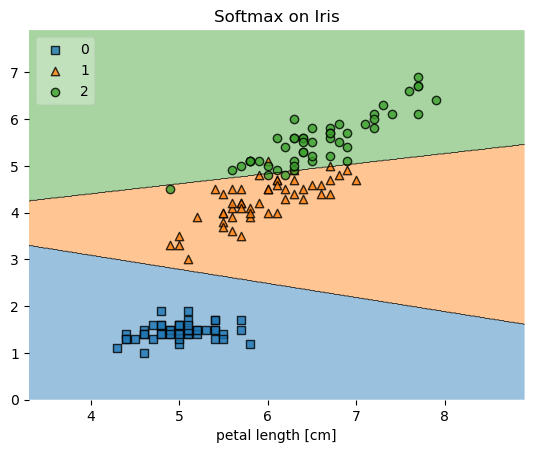

In [23]:
plot_decision_regions(X.values, y.values, lor, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()